In [1]:
import numpy as np
import matplotlib.pyplot as plt


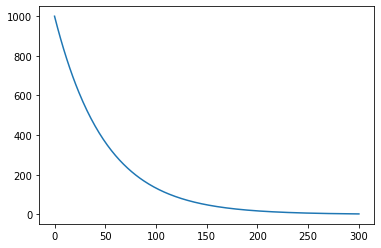

In [2]:
'''
a plane is landing assume that
altitude_t = 0.98 * altitude_t-1
'''
#-----input
ALTITUDE_0 = 1000 #assume in meters

#------logic
time_t = [0]
altitude_t = [ALTITUDE_0]

for i in range(1,300+1):
    time_t.append(i)
    altitude_t.append(altitude_t[-1] * 0.98)

plt.plot(time_t, altitude_t)
plt.show()
    
    

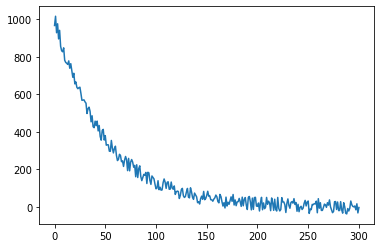

In [3]:
'''
assuming our sensor has noise:
observed_t = altitude_t + noise_t
'''

#-----input
#ALTITUDE_0 = 1000 #assume in meters
NOISE = 40 #assume +/- in meters

#------logic
# time_t = [0]
# altitude_t = [ALTITUDE_0]
observed_t = []



for index, real_altitude in enumerate(altitude_t):
    observed_t.append(real_altitude + np.random.uniform(-NOISE, NOISE))

plt.plot(time_t, observed_t)
plt.show()

In [4]:
'''
let's now make it more generic. 
x_k = a * x_k-1 //current state = changes * previous state
z_k = x_k + v_k //observed state = current state + noise

so if the state has disturbances, we can also add process noise
x_k = a * x_k-1 + w_k //current state = changes * previous state + process noise
z_k = x_k + v_k //observed state = current state + noise
'''

def thing():
    x=1
thing()
#now no dumb outputs

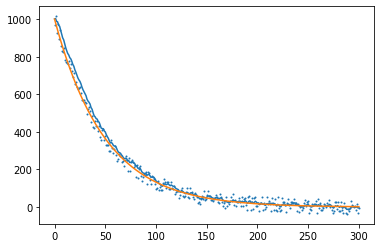

In [5]:
'''
without process noise
x_k = a * x_k-1 
z_k = x_k + v_k

we can rearrage the 2nd equation:
x_k = z_k - noise //current state = observed state - noise


low g = noisy sensor, high g = good sensor
x_hat_k = x_hat_k-1 + g_k (z_k - x_hat_k-1)

--> our current estimated state = previous estimated state
    + gain(previous observed value - previous estimated state)
'''

#-----input
#ALTITUDE_0 = 1000 #assume in meters
#NOISE = 40 #assume +/- in meters
GAIN = 0.2 # g_k

#------logic
# time_t = [0]
# altitude_t = [ALTITUDE_0]
# observed_t = []
estimated_state_t = [ALTITUDE_0]

for i, observed in enumerate(observed_t):
    if i == 0:
        continue
    predicted = estimated_state_t[-1] + GAIN * (observed - estimated_state_t[-1])
    
    estimated_state_t.append(predicted)
    
plt.scatter(time_t, observed_t, label = "observations", s=1)
plt.plot(time_t, estimated_state_t, label = "estimation")
plt.plot(time_t, altitude_t, label = "real")
plt.show()


19.883085675839943


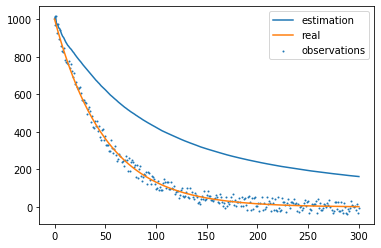

round: 0,  gain: 1,  prediction error: 10000
round: 1,  gain: 1.0,  prediction error: 19.84
round: 2,  gain: 0.5,  prediction error: 9.93
round: 3,  gain: 0.33,  prediction error: 6.62
round: 4,  gain: 0.25,  prediction error: 4.97
round: 5,  gain: 0.2,  prediction error: 3.98
round: 6,  gain: 0.17,  prediction error: 3.31
round: 7,  gain: 0.14,  prediction error: 2.84
round: 8,  gain: 0.12,  prediction error: 2.48
round: 9,  gain: 0.11,  prediction error: 2.21
round: 10,  gain: 0.1,  prediction error: 1.99
round: 11,  gain: 0.09,  prediction error: 1.81
round: 12,  gain: 0.08,  prediction error: 1.66
round: 13,  gain: 0.08,  prediction error: 1.53
round: 14,  gain: 0.07,  prediction error: 1.42
round: 15,  gain: 0.07,  prediction error: 1.33
round: 16,  gain: 0.06,  prediction error: 1.24
round: 17,  gain: 0.06,  prediction error: 1.17
round: 18,  gain: 0.06,  prediction error: 1.1
round: 19,  gain: 0.05,  prediction error: 1.05
round: 20,  gain: 0.05,  prediction error: 0.99
round: 2

In [6]:
'''
How do we compute gain?

recall that: measurement = actual_state + noise

manufactureres will typically publish sensor error ranges
• +/- r (property of the sensor)

thus, we can compute the gain by
•g_k = p_k-1 / (p_k-1 + r)
•where p_k is prediction error and is computed recursively
    p_k = (1-g_k) * p_k-1
    current prediction error = 
        (1-gain) * previous prediction error
'''


#-----input
#ALTITUDE_0 = 1000 #assume in meters
#NOISE = 40 #assume +/- in meters

#------logic
# time_t = [0]
# altitude_t = [ALTITUDE_0]
# observed_t = []
estimated_state_t = [ALTITUDE_0] #overwrite estimated state w/ new
g_k = [1]
p_k = [10000]


r = np.average(abs(np.array(altitude_t) - np.array(observed_t)))
print(r)

for k, time in enumerate(time_t):
    if k == 0:
        continue
    
    g_k.append( p_k[k-1] / (p_k[k-1] + r) )
    p_k.append( (1-g_k[k]) * p_k[k-1]     )
    
    predicted = estimated_state_t[-1] + g_k[k] * (observed_t[k] - estimated_state_t[-1])
    
    estimated_state_t.append(predicted)

plt.scatter(time_t, observed_t, label = "observations", s=1)
plt.plot(time_t, estimated_state_t, label = "estimation")
plt.plot(time_t, altitude_t, label = "real")
plt.legend()
plt.show()

# for thing in p_k:
#     print(round(thing,2))
for i in range(0, len(g_k)):
    print( f"round: {i},  gain: {round(g_k[i],2)},  prediction error: {round(p_k[i],2)}" )
    


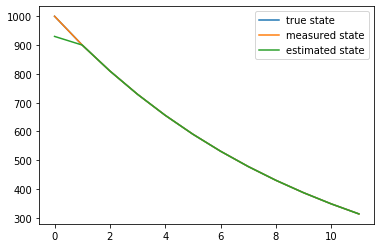

true: 1000,  estimated: 930, prediction error: 1
true: 900.0,  estimated: 900.0, prediction error: 0.0
true: 810.0,  estimated: 810.0, prediction error: 0.0
true: 729.0,  estimated: 729.0, prediction error: 0.0
true: 656.1,  estimated: 656.1, prediction error: 0.0
true: 590.49,  estimated: 590.49, prediction error: 0.0
true: 531.44,  estimated: 531.44, prediction error: 0.0
true: 478.3,  estimated: 478.3, prediction error: 0.0
true: 430.47,  estimated: 430.47, prediction error: 0.0
true: 387.42,  estimated: 387.42, prediction error: 0.0
true: 348.68,  estimated: 348.68, prediction error: 0.0
true: 313.81,  estimated: 313.81, prediction error: 0.0


In [7]:
'''
kalman filter in a nutshell

predict:
x_hat_k = a * x_hat_k-1

p_k = a * p_k-1 * a

update:
g_k = p_k-1 / (p_k-1 + r)
x_hat_k = x_hat_k + g_k (z_k - x_hat_k)
p_k = (1-g_k) p_k

z_k = x_k + v_k

'''

NOISE = 0
r = NOISE + 0.0000000000000000001
a = 0.90

#at k=0
x_k = 1000
z_k = 930
p_k = 1
x_hat_k = 930
g_k= 0
z_k = x_k + np.random.uniform(-NOISE, NOISE)





log = [[0, x_k, z_k, p_k, x_hat_k, g_k]]

for i in range(1,12):
    #motion
    x_k = a * x_k
    
    
    #predict
    
    x_hat_k = a * x_hat_k
    p_k = a * p_k * a 
    
    
    #sense
    z_k = x_k + np.random.uniform(-NOISE, NOISE)
    
    #update
    
    
    g_k = p_k / (p_k + r)
    x_hat_k = x_hat_k + g_k * (z_k - x_hat_k)
    p_k = (1-g_k) * p_k
    
    log.append([i, x_k, z_k, p_k, x_hat_k, g_k])


#print(log)
#plt.scatter(time_t, observed_t, label = "observations", s=1)
plt.plot([ i[0] for i in log], [ i[1] for i in log], label = "true state")
plt.plot([ i[0] for i in log], [ i[2] for i in log], label = "measured state")
plt.plot([ i[0] for i in log], [ i[4] for i in log], label = "estimated state")
#plt.plot(time_t, altitude_t, label = "real")
plt.legend()
plt.show()



#-----input
#ALTITUDE_0 = 1000 #assume in meters
#NOISE = 40 #assume +/- in meters

#------logic
# time_t = [0]
# altitude_t = [ALTITUDE_0]
# observed_t = []
# estimated_state_t = [ALTITUDE_0] #overwrite estimated state w/ new
# g_k = [1]
# p_k = [10000]




for i in log:
    print(f"true: {round(i[1],2)},  estimated: {round(i[4],2)}, prediction error: {round(i[3],2)}")

true_state = [i[1] for i in log]
estimated_state = [i[4] for i in log]


#print(np.average(abs(np.array(true_state) - np.array(estimated_state))))


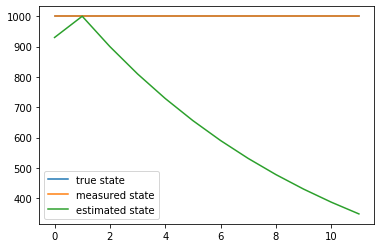

true: 1000,  estimated: 930, prediction error: 1
true: 1000,  estimated: 1000.0, prediction error: 0.0
true: 1000,  estimated: 900.0, prediction error: 0.0
true: 1000,  estimated: 810.0, prediction error: 0.0
true: 1000,  estimated: 729.0, prediction error: 0.0
true: 1000,  estimated: 656.1, prediction error: 0.0
true: 1000,  estimated: 590.49, prediction error: 0.0
true: 1000,  estimated: 531.44, prediction error: 0.0
true: 1000,  estimated: 478.3, prediction error: 0.0
true: 1000,  estimated: 430.47, prediction error: 0.0
true: 1000,  estimated: 387.42, prediction error: 0.0
true: 1000,  estimated: 348.68, prediction error: 0.0


In [8]:
#TODO: Comeback and tackle part 9 when our brains are bigger.

'''
kalman filter in a nutshell

predict:
x_hat_k = a * x_hat_k-1 + b * u_k
p_k = a * p_k-1 * a


update:
g_k = p_k-1 * c / (c* p_k-1 * c + r)
x_hat_k = x_hat_k + g_k (z_k - c* x_hat_k)
p_k = (1-g_k * c) p_k

z_k = x_k + v_k

'''

NOISE = 0
r = NOISE + 0.0000000000000000001
a = 0.90
b = 0.1
c = 0.1

#at k=0
x_k = 1000
z_k = 930
p_k = 1
x_hat_k = 930
g_k= 0
z_k = x_k + np.random.uniform(-NOISE, NOISE)







log = [[0, x_k, z_k, p_k, x_hat_k, g_k]]

for i in range(1,12):
    #motion
    #x_k = a * x_k + 
    
    
    #predict
    
    x_hat_k = a * x_hat_k
    p_k = a * p_k * a 
    
    
    #sense
    z_k = x_k + np.random.uniform(-NOISE, NOISE)
    
    #update
    
    
    g_k = p_k / (p_k + r)
    x_hat_k = x_hat_k + g_k * (z_k - x_hat_k)
    p_k = (1-g_k) * p_k
    
    log.append([i, x_k, z_k, p_k, x_hat_k, g_k])


#print(log)
#plt.scatter(time_t, observed_t, label = "observations", s=1)
plt.plot([ i[0] for i in log], [ i[1] for i in log], label = "true state")
plt.plot([ i[0] for i in log], [ i[2] for i in log], label = "measured state")
plt.plot([ i[0] for i in log], [ i[4] for i in log], label = "estimated state")
#plt.plot(time_t, altitude_t, label = "real")
plt.legend()
plt.show()



#-----input
#ALTITUDE_0 = 1000 #assume in meters
#NOISE = 40 #assume +/- in meters

#------logic
# time_t = [0]
# altitude_t = [ALTITUDE_0]
# observed_t = []
# estimated_state_t = [ALTITUDE_0] #overwrite estimated state w/ new
# g_k = [1]
# p_k = [10000]




for i in log:
    print(f"true: {round(i[1],2)},  estimated: {round(i[4],2)}, prediction error: {round(i[3],2)}")

true_state = [i[1] for i in log]
estimated_state = [i[4] for i in log]


#print(np.average(abs(np.array(true_state) - np.array(estimated_state))))


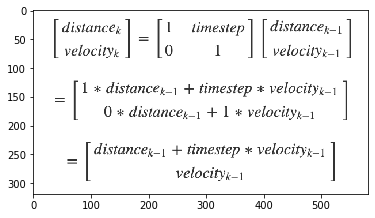

In [15]:
import matplotlib.image as mpimg

'''
so if we bring physics into the equation
distance_current = distance_previous + v * timestep

it's time for linear algebraaaaaaaaaaaaaaaaaaa

if
[a b] * [x] = [ax + by]
[c d]   [y]   [cx + by]

x_k = [ distance_k ]
      [ velocity_k ]
      

A = [1 timestep]       
    [0 1       ]
    
A * x_k-1 = **look at image below**
'''

img = mpimg.imread('shot1.png')
plt.imshow(img)
